<a href="https://colab.research.google.com/github/myungjinma/acorn_python/blob/main/0725_53%EC%9D%BC%EC%B0%A8(%EC%A0%9C%EA%B3%B1%ED%95%A9%5BRSS%2C_MSE%2C_RMSE%2C_TSS%2CR_squared%5D_%2C_lr_score%EA%B5%AC%ED%95%98%EA%B8%B0(boston%5Bresiduals%2C_prediction%2C_mean_squared_error%2C_r2_score%5D%2C%EB%8B%A8%EC%88%9C%ED%9A%8C%EA%B7%80%2C%EC%82%BC%EC%B0%A8%EB%8B%A4%ED%95%AD%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = {'x':[13,19,16,14,15,14],
        'y':[40,83,62,48,58,43]}

In [ ]:
data = pd.DataFrame(data)

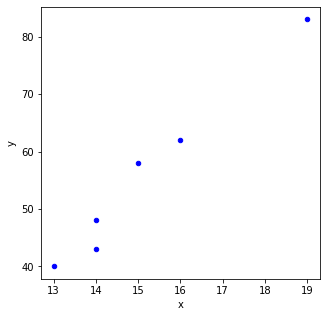

In [ ]:
data.plot(kind='scatter',
          x= 'x',
          y = 'y',
          figsize=(5,5),
          color='b')

In [ ]:
data

,x,y
0,13,40
1,19,83
2,16,62
3,14,48
4,15,58
5,14,43


In [ ]:
X = data['x'].values[:, np.newaxis]

In [ ]:
lr = linear_model.LinearRegression()
lr.fit(X ,data.y)
prediction = lr.predict(X)

In [ ]:
residuals = data['y']- prediction

In [ ]:
residuals

0    0.211679
1   -0.759124
2    0.226277
3    0.883212
4    3.554745
5   -4.116788
Name: y, dtype: float64

#선형회귀식을 위한 제곱합

In [ ]:
RSS = (residuals**2).sum()

In [ ]:
RSS

31.03649635036502

In [ ]:
MSE = RSS/6 #X값이 6개라 6개를 나눔

In [ ]:
RMSE = np.sqrt(MSE)

In [ ]:
RMSE

2.2743679103714736

In [ ]:
TSS = ((data['y']-data['y'].mean())**2).sum()

In [ ]:
TSS

1257.3333333333333

In [ ]:
R_squared = 1 - (RSS/TSS)

In [ ]:
R_squared

0.9753156179610034

In [ ]:
lr.score(X,data.y) #R2 값

0.9753156179610034

In [ ]:
from sklearn import datasets
boston = datasets.load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [ ]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [ ]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [ ]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
sklearn.metrics.r2_score

In [ ]:
#price y값

In [ ]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [ ]:
data = pd.DataFrame(boston.data)

In [ ]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
data.columns = boston.feature_names

In [ ]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
data['Price'] = boston.target

In [ ]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


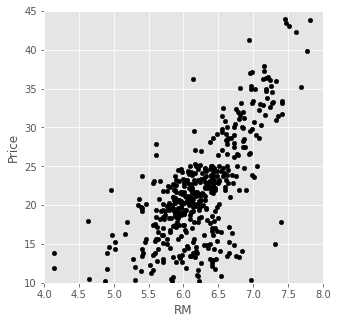

In [ ]:
import matplotlib
matplotlib.style.use('ggplot')
data.plot(kind='scatter', x='RM', 
          y='Price', figsize=(5,5), 
          color='black', xlim=(4,8), ylim=(10,45))


#1. 데이터 학습시키기

In [ ]:
X = data['RM'].values[:, np.newaxis]

In [ ]:
X.shape


(506, 1)

In [ ]:
y = data.Price

In [ ]:
y.shape

(506,)

In [ ]:
lr = linear_model.LinearRegression()

In [ ]:
lr.fit(X, y)

LinearRegression()

In [ ]:
prediction = lr.predict(X)

In [ ]:
print('a vlaue : ', lr.intercept_)
print('b value : ', lr.coef_)

a vlaue :  -34.67062077643857
b value :  [9.10210898]


In [ ]:
residuals = y - prediction

In [ ]:
residuals

0     -1.175746
1     -2.174021
2      3.971968
3      4.374062
4      5.817848
         ...   
501   -2.939584
502   -0.434286
503   -4.925691
504   -5.169108
505   -8.315096
Name: Price, Length: 506, dtype: float64

In [ ]:
residuals.describe()

count    5.060000e+02
mean     2.134437e-15
std      6.609606e+00
min     -2.334590e+01
25%     -2.547477e+00
50%      8.976267e-02
75%      2.985532e+00
max      3.943314e+01
Name: Price, dtype: float64

In [ ]:
RSS = (residuals**2).sum()

In [ ]:
RSS

22061.879196211798

In [ ]:
MSE = RSS/505 #X값이 505개라 505개를 나눔

In [ ]:
MSE

43.6868894974491

In [ ]:
RMSE = np.sqrt(MSE)

In [ ]:
RMSE

6.609605850385415

In [ ]:
TSS = ((y-y.mean())**2).sum()

In [ ]:
TSS

42716.29541501977

In [ ]:
R_squared = 1 - (RSS/TSS)

In [ ]:
R_squared

0.48352545599133423

In [ ]:
lr.score(X,y) #R2 값

0.48352545599133423

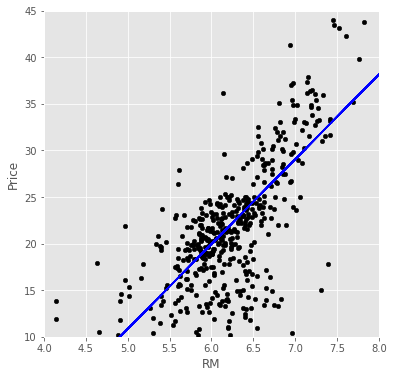

In [ ]:
data.plot(kind='scatter', x='RM', y='Price', figsize=(6,6), color='black',
         xlim=(4,8), ylim=(10, 45))

plt.plot(X, prediction, color='b')

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print('Score : ', lr.score(X, y))
print('Mean Squared Error : ', mean_squared_error(prediction, y))
print('RMSE : ', mean_squared_error(prediction, y)**.5)

Score :  0.48352545599133423
Mean Squared Error :  43.60055177116956
RMSE :  6.603071389222561


In [ ]:
lr.score(X,y)

0.48352545599133423

In [ ]:
r2_score(y, prediction)

0.48352545599133423

In [ ]:
mean_squared_error(y, prediction)

43.60055177116956

두개 이상의 독립변수와 하나의 종속변수로 이루어진 회귀

단순 회귀의 확장

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y_target = data['Price']
X_data = data.drop(['Price'],axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_preds)
print(mse)
rmse = np.sqrt(mse)
print(rmse)
r2_score(y_test, y_preds)


17.296915907902022
4.158956107955699


0.7572263323138939

In [ ]:
np.round(lr.coef_, 1)

array([ -0.1,   0.1,   0. ,   3. , -19.8,   3.4,   0. ,  -1.7,   0.4,
        -0. ,  -0.9,   0. ,  -0.6])

In [ ]:
lr.intercept_

40.99559517216477

In [ ]:
coeff = pd.Series(data = np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

회귀식을 구하는 경우 cross_val_score나 GridSearchSV 를 사용할 경우 scoring = "neg_mean_squared_error"이라고 적어주어야한다.

neg_mean_squared_error 는 MAE 나 MSE 를 계산하는 metrics.mean_ablsoute_error 함수나 metrics.mean_squared_error 의 결과값에 (-1)을 곱해 준다.

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
neg_mse = cross_val_score(lr, X_data, y_target , scoring='neg_mean_squared_error', cv=5)

In [ ]:
rmse_scores = np.sqrt(-1 *neg_mse)

In [ ]:
rmse_scores

array([3.52991509, 5.10378498, 5.75101191, 8.9867887 , 5.77179405])

In [ ]:
np.mean(rmse_scores)

5.828658946215802

In [ ]:
avg_rmse = np.mean(rmse_scores)

In [ ]:
#cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print(' 5 folds 의 개별 Negative MSE scores : ' , np.round(neg_mse, 2))
print(' 5 folds 의 개별 RMSE scores : ' , np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE :{0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores :  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE :5.829 


#삼차 다항 회귀의 예제

1. 알고있는 3차함수를 이용해 y값 만들기 (종속변수 값 만들기)

In [145]:
def polynomial_func(X):
  y = 1+2*X[:,0] + 3*X[:, 0]**2 +4*X[:,1]**3
  return y

X = np.arange(0,4).reshape(2,2)

print('일차 단항식 계수 feature: \n' ,X)
y = polynomial_func(X)
print('삼차 다항식 값 : \n ',y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 값 : 
  [  5 125]


2. 1차 다항식 값을 3차 다항식 값으로 변경

In [128]:
from sklearn.preprocessing import PolynomialFeatures

In [146]:
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 features : \n' , poly_ftr)

3차 다항식 계수 features : 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]


In [147]:
poly = PolynomialFeatures(3)
poly.fit(X)

PolynomialFeatures(degree=3)

In [148]:
poly.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['1',
 'x0',
 'x1',
 'x0^2',
 'x0 x1',
 'x1^2',
 'x0^3',
 'x0^2 x1',
 'x0 x1^2',
 'x1^3']

In [149]:
poly = PolynomialFeatures(2)
poly.fit(X)

PolynomialFeatures()

In [150]:
poly.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

In [151]:
poly_ftr

array([[ 1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.,  8., 12., 18., 27.]])

In [152]:
y

array([  5, 125])

In [153]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(poly_ftr , y)

LinearRegression()

In [154]:
np.round(lr.coef_, 2)

array([0.  , 0.18, 0.18, 0.36, 0.54, 0.72, 0.72, 1.08, 1.62, 2.34])

In [155]:
lr.coef_.shape

(10,)

In [140]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [156]:
model = Pipeline([('poly', PolynomialFeatures(degree=3)), ('linear', LinearRegression())])

In [157]:
X

array([[0, 1],
       [2, 3]])

In [158]:
y

array([  5, 125])

In [159]:
model = model.fit(X,y)

In [160]:
np.round(model.named_steps['linear'].coef_, 2)

array([0.  , 0.18, 0.18, 0.36, 0.54, 0.72, 0.72, 1.08, 1.62, 2.34])

#과대적합 예제

In [165]:
def true_fun(X):
  return np.cos(1.5 * np.pi *X)

In [162]:
np.random.seed(0)
n_samples =30
X = np.sort(np.random.rand(n_samples))

In [166]:
y = true_fun(X) + np.random.randn(n_samples) * 0.1

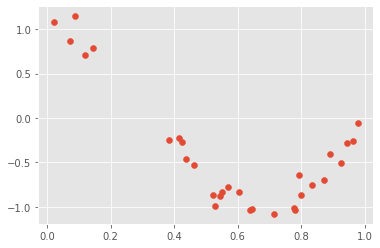

In [167]:
plt.scatter(X, y)

In [168]:
X

array([0.0202184 , 0.07103606, 0.0871293 , 0.11827443, 0.14335329,
       0.38344152, 0.41466194, 0.4236548 , 0.43758721, 0.46147936,
       0.52184832, 0.52889492, 0.54488318, 0.5488135 , 0.56804456,
       0.60276338, 0.63992102, 0.64589411, 0.71518937, 0.77815675,
       0.78052918, 0.79172504, 0.79915856, 0.83261985, 0.87001215,
       0.891773  , 0.92559664, 0.94466892, 0.96366276, 0.97861834])

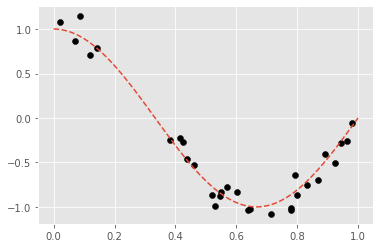

In [170]:
X_test = np.linspace(0 ,1 ,100)
y_test = true_fun(X_test)
plt.scatter(X, y , c='k')
plt.plot(X_test, y_test, '--', label='True function')

In [ ]:
pit.figure(figsize = (14,5))
degrees = [1, 4, 15]
for i in range(len(degrees)):